In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
import os

BASE_DIR = '/content/drive/MyDrive/hackathon_2025'
os.makedirs(BASE_DIR, exist_ok=True)
BASE_DIR


'/content/drive/MyDrive/hackathon_2025'

In [ ]:
import os
import shutil
from glob import glob

RAW_DIR = '/content/drive/MyDrive/hackathon_2025/DataSet_CdTe'
OUT_DIR_TIF = '/content/drive/MyDrive/hackathon_2025/defect_patches'
os.makedirs(OUT_DIR_TIF, exist_ok=True)

images = sorted(glob(os.path.join(RAW_DIR, '*')))

for i, path in enumerate(images):
    ext = os.path.splitext(path)[-1].lower()
    new_name = f"{i:05d}{ext}"  # 00000.png → 01118.png
    shutil.copy(path, os.path.join(OUT_DIR_TIF, new_name))

len(images)


1119

In [ ]:
CONVERTED_DIR = '/content/drive/MyDrive/hackathon_2025/DataSet_CdTe_png'
os.makedirs(CONVERTED_DIR, exist_ok=True)

tif_files = sorted(glob(os.path.join(RAW_DIR, "*.tif")))

print("Found", len(tif_files), "TIFF files")

for tif_path in tif_files:
    img = Image.open(tif_path)
    img = img.convert("L")  # grayscale
    new_name = os.path.splitext(os.path.basename(tif_path))[0] + ".png"
    out_path = os.path.join(CONVERTED_DIR, new_name)
    img.save(out_path, format="PNG")

print("Conversion complete:", len(tif_files), "files converted.")

Found 1119 TIFF files
Conversion complete: 1119 files converted.


In [3]:
OUT_DIR = '/content/drive/MyDrive/hackathon_2025/defect_patches_png'
os.makedirs(OUT_DIR, exist_ok=True)

In [2]:
OUT_DIR = '/content/drive/MyDrive/hackathon_2025/defect_patches_png'
os.makedirs(OUT_DIR, exist_ok=True)

png_files = sorted(glob(os.path.join(CONVERTED_DIR, "*.png")))
print("Found", len(png_files), "PNG files to rename.")

for idx, path in enumerate(png_files):
    new_name = f"{idx:05d}.png"   # 00000.png, 00001.png, ...
    shutil.copy(path, os.path.join(OUT_DIR, new_name))

print("Renaming complete:", len(png_files), "files saved to", OUT_DIR)


NameError: name 'CONVERTED_DIR' is not defined

In [ ]:
import pandas as pd

manifest = []

for idx, path in enumerate(png_files):
    original = os.path.basename(path)
    new_name = f"{idx:05d}.png"
    manifest.append({"new_name": new_name, "original_name": original})

df = pd.DataFrame(manifest)
df.to_csv(os.path.join(BASE_DIR, "manifest_png.csv"), index=False)

df.head()


,new_name,original_name
0,00000.png,Bulk_0.png
1,00001.png,Bulk_1.png
2,00002.png,Bulk_10.png
3,00003.png,Bulk_100.png
4,00004.png,Bulk_101.png


In [ ]:
import pandas as pd

manifest = []

for i, path in enumerate(images):
    ext = os.path.splitext(path)[-1].lower()
    new_name = f"{i:05d}{ext}"
    manifest.append({
        'new_name': new_name,
        'original_name': os.path.basename(path)
    })

df = pd.DataFrame(manifest)
df.to_csv(os.path.join(BASE_DIR, 'manifest.csv'), index=False)
df.head()


,new_name,original_name
0,00000.tif,Bulk_0.tif
1,00001.tif,Bulk_1.tif
2,00002.tif,Bulk_10.tif
3,00003.tif,Bulk_100.tif
4,00004.tif,Bulk_101.tif


In [ ]:
from PIL import Image

bad = []
for file in df['new_name']:
    try:
        Image.open(os.path.join(OUT_DIR, file)).verify()
    except:
        bad.append(file)

bad[:10], len(bad)


([], 0)

In [8]:
from google.colab import userdata
api_key = userdata.get('OPENAI_API_KEY')

from openai import OpenAI
client = OpenAI(api_key=api_key)


In [9]:
models = client.models.list()
for m in models.data:
    print(m.id)


gpt-4-0613
gpt-4
gpt-3.5-turbo
chatgpt-image-latest
gpt-4o-mini-tts-2025-03-20
gpt-4o-mini-tts-2025-12-15
gpt-realtime-mini-2025-12-15
gpt-audio-mini-2025-12-15
davinci-002
babbage-002
gpt-3.5-turbo-instruct
gpt-3.5-turbo-instruct-0914
dall-e-3
dall-e-2
gpt-4-1106-preview
gpt-3.5-turbo-1106
tts-1-hd
tts-1-1106
tts-1-hd-1106
text-embedding-3-small
text-embedding-3-large
gpt-4-0125-preview
gpt-4-turbo-preview
gpt-3.5-turbo-0125
gpt-4-turbo
gpt-4-turbo-2024-04-09
gpt-4o
gpt-4o-2024-05-13
gpt-4o-mini-2024-07-18
gpt-4o-mini
gpt-4o-2024-08-06
chatgpt-4o-latest
gpt-4o-audio-preview
gpt-4o-realtime-preview
omni-moderation-latest
omni-moderation-2024-09-26
gpt-4o-realtime-preview-2024-12-17
gpt-4o-audio-preview-2024-12-17
gpt-4o-mini-realtime-preview-2024-12-17
gpt-4o-mini-audio-preview-2024-12-17
o1-2024-12-17
o1
gpt-4o-mini-realtime-preview
gpt-4o-mini-audio-preview
o3-mini
o3-mini-2025-01-31
gpt-4o-2024-11-20
gpt-4o-search-preview-2025-03-11
gpt-4o-search-preview
gpt-4o-mini-search-preview-2

In [5]:
MODEL = "gpt-4o-mini"


In [33]:
import random

FILES = sorted(glob(os.path.join(OUT_DIR, '*')))

# select 20 random images
random_sample = random.sample(FILES, 20)
FILES_20 = random_sample   # override the global FILES list

len(FILES_20), FILES_20[:5]


(20,
 ['/content/drive/MyDrive/hackathon_2025/defect_patches_png/00377.png',
  '/content/drive/MyDrive/hackathon_2025/defect_patches_png/00945.png',
  '/content/drive/MyDrive/hackathon_2025/defect_patches_png/00415.png',
  '/content/drive/MyDrive/hackathon_2025/defect_patches_png/00866.png',
  '/content/drive/MyDrive/hackathon_2025/defect_patches_png/00542.png'])

In [ ]:
# Colab-ready: batch classify via Responses API using inline base64 images
import os, base64, json, time, re
import pandas as pd
from glob import glob

RESULT_CSV = os.path.join(BASE_DIR, 'responses_results_gpt4o_mini.csv')

# FILES = sorted(glob(os.path.join(OUT_DIR, '*')))

# Small helper: extract first JSON-looking substring from text
def extract_json_from_text(text):
    """
    Extract the first {...} block that looks like JSON.
    Works even if the model outputs extra text.
    """
    # Find the first substring starting with '{' and ending with '}'
    # lazily, across multiple lines.
    pattern = r'\{.*?\}'
    matches = re.findall(pattern, text, flags=re.DOTALL)

    for m in matches:
        try:
            return json.loads(m)
        except:
            pass

    return None

# ---------- classifier function (correct Responses image format) ----------
def classify_with_dataurl(path, model=MODEL, max_retries=3):
    with open(path, "rb") as f:
        raw = f.read()
    b64 = base64.b64encode(raw).decode("utf-8")
    data_url = f"data:image/png;base64,{b64}"

    core_instruction_0 = (
        "You are a materials-science assistant. Classify the image patch into one of: "
        "bulk, interstitial, Lomer-Cottrell dislocation, stacking fault, twin_bound, vacancy. "
        "Return strict JSON only: {\"c\":\"<class>\", \"e\":\"<1-2 sentence explanation>\", \"conf\":<0-1>}"
    )

    core_instruction_1 = (
        "You are a materials-science assistant analyzing 64×64 atomic-resolution CdTe patches. "
        "Classify the image into one of: bulk (defect-free), interstitial, Lomer–Cottrell dislocation, "
        "stacking fault, twin boundary, or vacancy. "
        "Definitions: bulk = ideal region with no defect; interstitial = extra atom at a non-lattice site; "
        "Lomer–Cottrell dislocation = sessile dislocation formed by two partials; stacking fault = deviation from "
        "the ideal stacking sequence; twin boundary = regions related by a crystallographic twin operation; "
        "vacancy = missing atom at a lattice site. "
        "Return strict JSON only: {\"c\":\"<class>\", \"e\":\"<1-2 sentence explanation>\", \"conf\":<0-1>}."
    )

    core_instruction_2 = (
        "You are a materials-science assistant analyzing 64×64 atomic-resolution CdTe patches. "
        "Classify the image into one of: bulk (defect-free), interstitial, Lomer–Cottrell dislocation, "
        "stacking fault, twin boundary, or vacancy. "
        "Visual cues: bulk = fully periodic dumbbell lattice with no anomalies; "
        "interstitial = an extra bright spot or dumbbell between normal lattice sites; "
        "Lomer–Cottrell dislocation = strong localized distortion forming a junction of bending lattice rows; "
        "stacking fault = a straight boundary where lattice rows shift phase across the plane; "
        "twin boundary = a straight boundary where the lattice shows mirror symmetry across the plane; "
        "vacancy = a dark site where a bright dumbbell should be. "
        "Return strict JSON only: {\"c\":\"<class>\", \"e\":\"<1-2 sentence explanation>\", \"conf\":<0-1>}."
    )

    core_instruction_combined = (
        "You are a materials-science assistant analyzing 64×64 atomic-resolution CdTe patches. "
        "Classify the image into one of: bulk (defect-free), interstitial, Lomer–Cottrell dislocation, "
        "stacking fault, twin boundary, or vacancy. "
        "Definitions (conceptual): bulk = an ideal defect-free region; interstitial = an extra atom at a non-lattice site; "
        "Lomer–Cottrell dislocation = a sessile node formed by two partial dislocations; stacking fault = deviation from the ideal stacking sequence; "
        "twin boundary = two regions related by a crystallographic twin operation; vacancy = a missing atom at a lattice site. "
        "Visual cues: bulk = fully periodic dumbbell pattern; interstitial = an extra bright spot between lattice sites; "
        "LC = a localized junction with bending/shifted lattice rows; SF = a straight boundary with row phase-shift; "
        "twin = a straight boundary showing mirror-like relation across it; vacancy = a dark/empty site where a dumbbell should be. "
        "Return strict JSON only: {\"c\":\"<class>\", \"e\":\"<1-2 sentence explanation>\", \"conf\":<0-1>}."
    )


    input_item = [{
        "role": "user",
        "content": [
            {"type": "input_text", "text": core_instruction_combined},
            {"type": "input_image", "image_url": data_url}
        ]
    }]

    backoff = 1.0
    for attempt in range(1, max_retries+1):
        try:
            resp = client.responses.create(model=model, input=input_item, max_output_tokens=250)
            raw_text = None
            if hasattr(resp, "output_text") and resp.output_text:
                raw_text = resp.output_text
            else:
                out = getattr(resp, "output", None) or resp.get("output", None)
                if out and len(out) > 0:
                    first = out[0].get("content", out[0].content if hasattr(out[0], "content") else None)
                    if isinstance(first, list):
                        for it in first:
                            if isinstance(it, dict) and it.get("text"):
                                raw_text = it.get("text"); break
                            elif hasattr(it, "text") and it.text:
                                raw_text = it.text; break
                    elif isinstance(first, dict):
                        raw_text = first.get("text") or getattr(first, "text", None)
            if raw_text is None:
                raw_text = str(resp)

            js = extract_json_from_text(raw_text)
            if js is None:
                return {"raw": raw_text, "ok": False}

            c = js.get("c") or js.get("label") or js.get("class")
            e = js.get("e") or js.get("explanation") or js.get("reason")
            conf = js.get("conf")
            try:
                conf = float(conf) if conf is not None else None
            except:
                conf = None

            return {"c": c, "e": e, "conf": conf, "raw": raw_text, "ok": True}

        except Exception as err:
            print(f"Attempt {attempt} failed: {err}; backing off {backoff}s")
            time.sleep(backoff)
            backoff *= 2.0

    return {"raw": None, "ok": False, "error": "max_retries_exceeded"}

# --- Batch loop with incremental saving ---
results = []
start_index = 0   # change if resuming from a partial run
for i, path in enumerate(FILES_20[start_index:], start=start_index):
    fname = os.path.basename(path)
    print(f"[{i+1}/{len(FILES_20)}] {fname}", flush=True)
    out = classify_with_dataurl(path)
    out_record = {
        "filename": fname,
        "model": MODEL,
        "pred_class": out.get("c"),
        "explanation": out.get("e"),
        "confidence": out.get("conf"),
        "ok": out.get("ok"),
        "raw": out.get("raw"),
        "error": out.get("error", "")
    }
    results.append(out_record)

    # save each N items to avoid data loss
    if (i+1) % 20 == 0 or (i+1) == len(FILES_20):
        pd.DataFrame(results).to_csv(RESULT_CSV, index=False)
        print(f"Saved {len(results)} results to {RESULT_CSV}")

[1/20] 01002.png
[2/20] 00567.png
[3/20] 00920.png
[4/20] 00241.png
[5/20] 00966.png
[6/20] 00973.png
[7/20] 00429.png
[8/20] 01069.png
[9/20] 01033.png
[10/20] 00718.png
[11/20] 00045.png
[12/20] 00692.png
[13/20] 00549.png
[14/20] 00947.png
[15/20] 00398.png
[16/20] 00209.png
[17/20] 00484.png
[18/20] 00979.png
[19/20] 00301.png
[20/20] 00079.png
Saved 20 results to /content/drive/MyDrive/hackathon_2025/responses_results_gpt4o_mini.csv


In [ ]:
import os, re
import pandas as pd

# which test CSV you generated
TEST_CSV = "/content/drive/MyDrive/hackathon_2025/responses_results_gpt4o_mini.csv"
MANIFEST_CSV = "/content/drive/MyDrive/hackathon_2025/manifest_png.csv"
OUT_AUG = os.path.join(BASE_DIR, "responses_results_gpt4o_mini.csv")
# canonical labels we expect
CANONICAL = ["bulk", "interstitial", "LC", "SF", "twin_bound", "vacancy"]
# ---------- end config ----------

# load files
results = pd.read_csv(TEST_CSV)
manifest = pd.read_csv(MANIFEST_CSV)

merged = results.merge(manifest, left_on="filename", right_on="new_name", how="left")

# function to map an original filename to one of canonical labels (or None)
def infer_label_from_name(name):
    if pd.isna(name):
        return None
    s = name.lower()
    # checks in order of specificity
    if "lomer" in s or "l-c" in s or re.search(r'\blc\b', s):
        return "LC"
    if "stack" in s or "stacking" in s or re.search(r'\bsf\b', s):
        return "SF"
    if "twin" in s:
        # map "twin bound" or "twin" -> twin_bound
        return "twin_bound"
    if "interst" in s or "interstitial" in s:
        return "interstitial"
    if "vac" in s or "vacancy" in s:
        return "vacancy"
    if "bulk" in s:
        return "bulk"
    # fallback: try to find any canonical substring
    for lab in CANONICAL:
        if lab.lower() in s:
            return lab
    return None

# normalize model prediction into same canonical label set
def normalize_pred(pred):
    if pd.isna(pred):
        return None
    p = str(pred).lower().strip()
    # common variants mapping
    if p in ["bulk", "bulk defect", "bulk_defect"]:
        return "bulk"
    if "interst" in p or "interstitial" in p:
        return "interstitial"
    if p in ["lc", "l c", "lomer-cottrell", "lomer cottrell", "lomer"]:
        return "LC"
    if p in ["sf", "stacking fault", "stacking_fault", "stacking"]:
        return "SF"
    if "twin" in p:
        return "twin_bound"
    if "vac" in p or "vacancy" in p:
        return "vacancy"
    # last-ditch: check substrings
    for lab in CANONICAL:
        if lab.lower() in p:
            return lab
    return p  # unknown label left as-is

# apply inference + normalization
merged["ground_truth"] = merged["original_name"].apply(infer_label_from_name)
merged["pred_norm"] = merged["pred_class"].apply(normalize_pred)

# compare (True/False/NaN)
merged["match"] = merged.apply(
    lambda r: (r["pred_norm"] == r["ground_truth"]) if (pd.notna(r["pred_norm"]) and pd.notna(r["ground_truth"])) else False,
    axis=1
)

# summary stats
total = len(merged)
correct = merged["match"].sum()
acc = correct / total if total>0 else 0.0

print(f"Total samples: {total}")
print(f"Correct predictions: {correct}")
print(f"Accuracy: {acc:.3%}")

# per-class breakdown
print("\nPer-class (ground truth) accuracy:")
print(merged.groupby("ground_truth")["match"].agg(["count","sum","mean"]).rename(columns={"sum":"correct","mean":"accuracy"}))

# show mismatches for inspection
mismatches = merged[~merged["match"]].sort_values(by=["ground_truth","pred_norm"])
print("\nSample mismatches:")
display_cols = ["filename","original_name","ground_truth","pred_class","pred_norm","explanation","raw"]
print(mismatches[display_cols].head(20).to_string(index=False))

# save augmented CSV
merged.to_csv(OUT_AUG, index=False)
print(f"\nSaved augmented results to: {OUT_AUG}")


Total samples: 20
Correct predictions: 4
Accuracy: 20.000%

Per-class (ground truth) accuracy:
              count  correct  accuracy
ground_truth                          
LC                3        0  0.000000
SF                5        1  0.200000
bulk              2        2  1.000000
interstitial      6        1  0.166667
twin_bound        2        0  0.000000
vacancy           2        0  0.000000

Sample mismatches:
 filename        original_name ground_truth     pred_class pred_norm                                                                                                                                                       explanation                                                                                                                                                                                                         raw
00209.png            LC_12.png           LC stacking fault        SF                  The image shows a straight boundary with a clear pha

In [6]:
import random

FILES = sorted(glob(os.path.join(OUT_DIR, '*')))

# select 200 random images
random_sample = random.sample(FILES, 200)
FILES_200 = random_sample   # override the global FILES list

len(FILES_200), FILES_200[:5]


(200,
 ['/content/drive/MyDrive/hackathon_2025/defect_patches_png/00106.png',
  '/content/drive/MyDrive/hackathon_2025/defect_patches_png/00661.png',
  '/content/drive/MyDrive/hackathon_2025/defect_patches_png/00156.png',
  '/content/drive/MyDrive/hackathon_2025/defect_patches_png/00822.png',
  '/content/drive/MyDrive/hackathon_2025/defect_patches_png/00717.png'])

In [40]:
import random

FILES = sorted(glob(os.path.join(OUT_DIR, '*')))

# select 200 random images
random_sample = random.sample(FILES, 30)
FILES_30 = random_sample   # override the global FILES list

len(FILES_30), FILES_30[:5]

(30,
 ['/content/drive/MyDrive/hackathon_2025/defect_patches_png/00551.png',
  '/content/drive/MyDrive/hackathon_2025/defect_patches_png/00018.png',
  '/content/drive/MyDrive/hackathon_2025/defect_patches_png/00670.png',
  '/content/drive/MyDrive/hackathon_2025/defect_patches_png/01090.png',
  '/content/drive/MyDrive/hackathon_2025/defect_patches_png/00929.png'])

In [45]:
import os, base64, json, time, random
from glob import glob
import pandas as pd

# --- 1) Choose example files (provide paths to *your* chosen images) ---
# You should replace these picks with the clearest example files from your dataset.
# Option A: specify exact filenames (recommended)
prompt_examples_6 = [
    {"image_path": os.path.join(OUT_DIR, "00000.png"), "text": "class: bulk. Reason: pristine, defect-free lattice with fully periodic dumbbell pattern."},
    {"image_path": os.path.join(OUT_DIR, "00964.png"), "text": "class: interstitial. Reason: extra bright atom/dumbbell located between regular lattice sites."},
    {"image_path": os.path.join(OUT_DIR, "00185.png"), "text": "class: LC. Reason: localized node where lattice rows bend at a junction from intersecting dislocations."},
    {"image_path": os.path.join(OUT_DIR, "00368.png"), "text": "class: SF. Reason: straight planar offset where lattice rows show a phase shift across a boundary."},
    {"image_path": os.path.join(OUT_DIR, "00739.png"), "text": "class: twin_bound. Reason: regions related by a twin operation (crystallographic twin relationship)."},
    {"image_path": os.path.join(OUT_DIR, "00913.png"), "text": "class: vacancy. Reason: a dark/missing dumbbell at a lattice site while surrounding lattice is intact."}
]

prompt_examples_12 = [
    {"image_path": os.path.join(OUT_DIR, "00000.png"), "text": "class: bulk. Reason: pristine, defect-free lattice with fully periodic dumbbell pattern."},
    {"image_path": os.path.join(OUT_DIR, "00964.png"), "text": "class: interstitial. Reason: extra bright atom/dumbbell located between regular lattice sites."},
    {"image_path": os.path.join(OUT_DIR, "00185.png"), "text": "class: LC. Reason: localized node where lattice rows bend at a junction from intersecting dislocations."},
    {"image_path": os.path.join(OUT_DIR, "00368.png"), "text": "class: SF. Reason: straight planar offset where lattice rows show a phase shift across a boundary."},
    {"image_path": os.path.join(OUT_DIR, "00739.png"), "text": "class: twin_bound. Reason: regions related by a twin operation (crystallographic twin relationship)."},
    {"image_path": os.path.join(OUT_DIR, "00913.png"), "text": "class: vacancy. Reason: a dark/missing dumbbell at a lattice site while surrounding lattice is intact."},
    {"image_path": os.path.join(OUT_DIR, "00003.png"), "text": "class: bulk. Reason: pristine, defect-free lattice with fully periodic dumbbell pattern."},
    {"image_path": os.path.join(OUT_DIR, "00968.png"), "text": "class: interstitial. Reason: extra bright atom/dumbbell located between regular lattice sites."},
    {"image_path": os.path.join(OUT_DIR, "00188.png"), "text": "class: LC. Reason: localized node where lattice rows bend at a junction from intersecting dislocations."},
    {"image_path": os.path.join(OUT_DIR, "00376.png"), "text": "class: SF. Reason: straight planar offset where lattice rows show a phase shift across a boundary."},
    {"image_path": os.path.join(OUT_DIR, "00736.png"), "text": "class: twin_bound. Reason: regions related by a twin operation (crystallographic twin relationship)."},
    {"image_path": os.path.join(OUT_DIR, "00797.png"), "text": "class: vacancy. Reason: a dark/missing dumbbell at a lattice site while surrounding lattice is intact."}
]

prompt_examples_6_v = [
    {"image_path": os.path.join(OUT_DIR, "00000.png"), "text": "class: bulk. Reason: pristine, defect-free lattice with fully periodic dumbbell pattern."},
    {"image_path": os.path.join(OUT_DIR, "00964.png"), "text": "class: interstitial. Reason: extra bright atom/dumbbell located between regular lattice sites."},
    {"image_path": os.path.join(OUT_DIR, "00185.png"), "text": "class: LC. Reason: localized node where lattice rows bend at a junction from intersecting dislocations."},
    {"image_path": os.path.join(OUT_DIR, "00368.png"), "text": "class: SF. Reason: straight planar offset where lattice rows show a phase shift across a boundary."},
    {"image_path": os.path.join(OUT_DIR, "00739.png"), "text": "class: twin_bound. Reason: regions related by a twin operation (crystallographic twin relationship)."},
    {"image_path": os.path.join(OUT_DIR, "00913.png"), "text": "class: vacancy. Reason: missing bright dumbbell at a lattice site (dark void)"},
    {"image_path": os.path.join(OUT_DIR, "00797.png"), "text": "class: vacancy. Reason: missing bright dumbbell at a lattice site (dark void)"}

]

# --- NOTE: replace the filenames above with the actual files you want to use as examples ---

# --- helper: convert file to data URL ---
def file_to_data_url(p):
    with open(p,"rb") as f:
        b = f.read()
    b64 = base64.b64encode(b).decode("utf-8")
    return f"data:image/png;base64,{b64}"

# --- build prompt_examples_data with data URLs (for Requests) ---
prompt_examples_data = []
for ex in prompt_examples_6:
    assert os.path.exists(ex["image_path"]), f"Example not found: {ex['image_path']}"
    prompt_examples_data.append({
        "text": ex["text"],
        "data_url": file_to_data_url(ex["image_path"])
    })

# --- classifier that accepts prompt_examples_data (injects examples before main request) ---
def classify_with_fewshot_dataurl(target_path, prompt_examples_data, model=MODEL, max_retries=3):
    # build input list: examples first, then the target
    input_items = []
    # add each example as its own user content block
    for ex in prompt_examples_data:
        input_items.append({
            "role":"user",
            "content":[
                {"type":"input_text","text": ex["text"]},
                {"type":"input_image","image_url": ex["data_url"]}
            ]
        })

    # main instruction + target image
    core_instruction = (
        "You are a materials-science assistant analyzing 64×64 atomic-resolution CdTe patches. "
        "Classify the image into one of: bulk, interstitial, LC, SF, twin_bound, vacancy. "
        "Return strict JSON only: {\"c\":\"<class>\", \"e\":\"<1-2 sentence explanation>\", \"conf\":<0-1>}"
    )
    # add target
    data_url = file_to_data_url(target_path)
    input_items.append({
        "role":"user",
        "content":[
            {"type":"input_text","text": core_instruction},
            {"type":"input_image","image_url": data_url}
        ]
    })

    # call API with retries
    backoff = 1.0
    for attempt in range(1, max_retries+1):
        try:
            resp = client.responses.create(model=model, input=input_items, max_output_tokens=200, temperature=0.0)
            # robustly extract text (same approach you used before)
            raw_text = None
            if hasattr(resp, "output_text") and resp.output_text:
                raw_text = resp.output_text
            else:
                out = getattr(resp, "output", None) or resp.get("output", None)
                if out and len(out)>0:
                    first = out[0].get("content", out[0].content if hasattr(out[0],"content") else None)
                    if isinstance(first, list):
                        for it in first:
                            if isinstance(it, dict) and it.get("text"):
                                raw_text = it.get("text"); break
                            elif hasattr(it, "text") and it.text:
                                raw_text = it.text; break
                    elif isinstance(first, dict):
                        raw_text = first.get("text") or getattr(first,"text",None)
            if raw_text is None:
                raw_text = str(resp)

            # extract JSON (simple extractor)
            import re, json
            m = re.search(r'\{.*?\}', raw_text, flags=re.DOTALL)
            if not m:
                return {"raw": raw_text, "ok": False}
            js = json.loads(m.group(0))
            c = js.get("c") or js.get("label") or js.get("class")
            e = js.get("e") or js.get("explanation") or js.get("reason")
            conf = js.get("conf")
            try: conf = float(conf) if conf is not None else None
            except: conf = None
            return {"c": c, "e": e, "conf": conf, "raw": raw_text, "ok": True}
        except Exception as err:
            print(f"Attempt {attempt} failed: {err}; backing off {backoff}s")
            time.sleep(backoff)
            backoff *= 2.0
    return {"raw": None, "ok": False, "error": "max_retries_exceeded"}

# --- Run test on 20 random images (not using any of the example files) ---
# all_files = sorted(glob(os.path.join(OUT_DIR,"*.png")))
# # exclude prompt examples from test set
# example_paths = set([os.path.abspath(e["image_path"]) for e in prompt_examples])
# test_candidates = [p for p in all_files if os.path.abspath(p) not in example_paths]

# sample = random.sample(test_candidates, min(TEST_SIZE, len(test_candidates)))
sample = FILES_30

test_results = []
for i, p in enumerate(sample, start=1):
    print(f"[{i}/{len(sample)}] {os.path.basename(p)}")
    r = classify_with_fewshot_dataurl(p, prompt_examples_data)
    test_results.append({
        "filename": os.path.basename(p),
        "pred_class": r.get("c"),
        "explanation": r.get("e"),
        "confidence": r.get("conf"),
        "ok": r.get("ok"),
        "raw": r.get("raw")
    })

out_file = os.path.join(BASE_DIR, "test_results_fewshot_gpt4o_mini.csv")
pd.DataFrame(test_results).to_csv(out_file, index=False)
print("Saved few-shot test results to", out_file)


[1/30] 00551.png
[2/30] 00018.png
[3/30] 00670.png
[4/30] 01090.png
[5/30] 00929.png
[6/30] 00472.png
[7/30] 00481.png
[8/30] 00275.png
[9/30] 00826.png
[10/30] 00426.png
[11/30] 00391.png
[12/30] 00654.png
[13/30] 01087.png
[14/30] 00905.png
[15/30] 00389.png
[16/30] 00462.png
[17/30] 01064.png
[18/30] 00837.png
[19/30] 00902.png
[20/30] 00333.png
[21/30] 00774.png
[22/30] 00587.png
[23/30] 00969.png
[24/30] 00129.png
[25/30] 01062.png
[26/30] 00825.png
[27/30] 00040.png
[28/30] 00995.png
[29/30] 00235.png
[30/30] 00136.png
Saved few-shot test results to /content/drive/MyDrive/hackathon_2025/test_results_fewshot_gpt4o_mini.csv


In [12]:
out_file = os.path.join(BASE_DIR, "test_results_fewshot_gpt4o_mini.csv")
pd.DataFrame(test_results).to_csv(out_file, index=False)
print("Saved few-shot test results to", out_file)

Saved few-shot test results to /content/drive/MyDrive/hackathon_2025/test_results_fewshot_gpt4o_mini.csv


In [46]:
import os, re
import pandas as pd

# which test CSV you generated
TEST_CSV = "/content/drive/MyDrive/hackathon_2025/test_results_fewshot_gpt4o_mini.csv"
MANIFEST_CSV = "/content/drive/MyDrive/hackathon_2025/manifest_png.csv"
OUT_AUG = os.path.join(BASE_DIR, "test_results_fewshot_gpt4o_mini.csv")
# canonical labels we expect
CANONICAL = ["bulk", "interstitial", "LC", "SF", "twin_bound", "vacancy"]
# ---------- end config ----------

# load files
results = pd.read_csv(TEST_CSV)
manifest = pd.read_csv(MANIFEST_CSV)

merged = results.merge(manifest, left_on="filename", right_on="new_name", how="left")

# function to map an original filename to one of canonical labels (or None)
def infer_label_from_name(name):
    if pd.isna(name):
        return None
    s = name.lower()
    # checks in order of specificity
    if "lomer" in s or "l-c" in s or re.search(r'\blc\b', s):
        return "LC"
    if "stack" in s or "stacking" in s or re.search(r'\bsf\b', s):
        return "SF"
    if "twin" in s:
        # map "twin bound" or "twin" -> twin_bound
        return "twin_bound"
    if "interst" in s or "interstitial" in s:
        return "interstitial"
    if "vac" in s or "vacancy" in s:
        return "vacancy"
    if "bulk" in s:
        return "bulk"
    # fallback: try to find any canonical substring
    for lab in CANONICAL:
        if lab.lower() in s:
            return lab
    return None

# normalize model prediction into same canonical label set
def normalize_pred(pred):
    if pd.isna(pred):
        return None
    p = str(pred).lower().strip()
    # common variants mapping
    if p in ["bulk", "bulk defect", "bulk_defect"]:
        return "bulk"
    if "interst" in p or "interstitial" in p:
        return "interstitial"
    if p in ["lc", "l c", "lomer-cottrell", "lomer cottrell", "lomer"]:
        return "LC"
    if p in ["sf", "stacking fault", "stacking_fault", "stacking"]:
        return "SF"
    if "twin" in p:
        return "twin_bound"
    if "vac" in p or "vacancy" in p:
        return "vacancy"
    # last-ditch: check substrings
    for lab in CANONICAL:
        if lab.lower() in p:
            return lab
    return p  # unknown label left as-is

# apply inference + normalization
merged["ground_truth"] = merged["original_name"].apply(infer_label_from_name)
merged["pred_norm"] = merged["pred_class"].apply(normalize_pred)

# compare (True/False/NaN)
merged["match"] = merged.apply(
    lambda r: (r["pred_norm"] == r["ground_truth"]) if (pd.notna(r["pred_norm"]) and pd.notna(r["ground_truth"])) else False,
    axis=1
)

# summary stats
total = len(merged)
correct = merged["match"].sum()
acc = correct / total if total>0 else 0.0

print(f"Total samples: {total}")
print(f"Correct predictions: {correct}")
print(f"Accuracy: {acc:.3%}")

# per-class breakdown
print("\nPer-class (ground truth) accuracy:")
print(merged.groupby("ground_truth")["match"].agg(["count","sum","mean"]).rename(columns={"sum":"correct","mean":"accuracy"}))

# show mismatches for inspection
mismatches = merged[~merged["match"]].sort_values(by=["ground_truth","pred_norm"])
print("\nSample mismatches:")
display_cols = ["filename","original_name","ground_truth","pred_class","pred_norm","explanation","raw"]
print(mismatches[display_cols].head(20).to_string(index=False))

# save augmented CSV
merged.to_csv(OUT_AUG, index=False)
print(f"\nSaved augmented results to: {OUT_AUG}")


Total samples: 30
Correct predictions: 15
Accuracy: 50.000%

Per-class (ground truth) accuracy:
              count  correct  accuracy
ground_truth                          
LC                3        2  0.666667
SF               10        4  0.400000
bulk              4        3  0.750000
interstitial      6        6  1.000000
twin_bound        1        0  0.000000
vacancy           6        0  0.000000

Sample mismatches:
 filename        original_name ground_truth pred_class  pred_norm                                                                                                                                                                                                                  explanation                                                                                                                                                                                                                                                                          raw
00275.png       

Columns found: ['filename', 'pred_class', 'explanation', 'confidence', 'ok', 'raw', 'new_name', 'original_name', 'ground_truth', 'pred_norm', 'match']


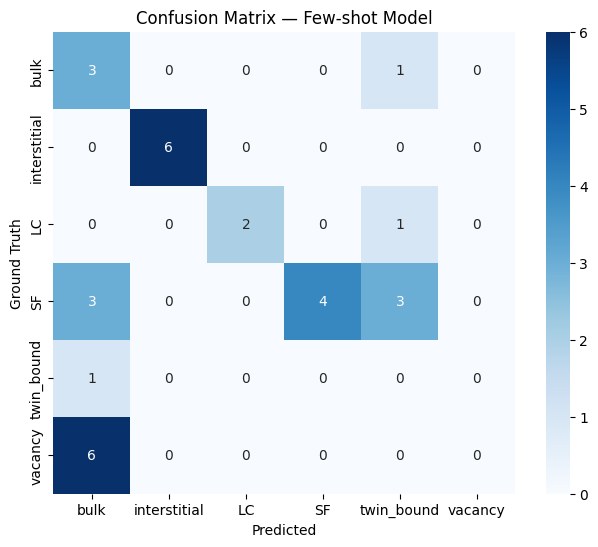

pred_norm     bulk  interstitial  LC  SF  twin_bound  vacancy
ground_truth                                                 
bulk             3             0   0   0           1        0
interstitial     0             6   0   0           0        0
LC               0             0   2   0           1        0
SF               3             0   0   4           3        0
twin_bound       1             0   0   0           0        0
vacancy          6             0   0   0           0        0


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# if you uploaded the csv to Drive or converted sheet to csv file in Drive path
csv_path = "/content/drive/MyDrive/hackathon_2025/test_results_fewshot_gpt4o_mini.csv"
df = pd.read_csv(csv_path)

# Inspect columns to confirm names
print("Columns found:", list(df.columns))
df.head()

# --- CONFUSION MATRIX ---
# Adjust these if your sheet uses different column names:
GT_COL = "ground_truth"
PRED_COL = "pred_norm"   # fallback to 'pred_class' if your sheet uses that

if PRED_COL not in df.columns:
    # try common alternative
    alt = "pred_class"
    if alt in df.columns:
        PRED_COL = alt
    else:
        raise KeyError(f"Could not find prediction column. Available columns: {list(df.columns)}")

# canonical ordering for the matrix
CLASSES = ["bulk", "interstitial", "LC", "SF", "twin_bound", "vacancy"]

clean = df.dropna(subset=[GT_COL, PRED_COL])
cm = pd.crosstab(clean[GT_COL], clean[PRED_COL], dropna=False)
cm = cm.reindex(index=CLASSES, columns=CLASSES, fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True)
plt.title("Confusion Matrix — Few-shot Model")
plt.ylabel("Ground Truth")
plt.xlabel("Predicted")
plt.show()

print(cm)